### The goal of this series of notebooks is to build a neural network that can recognize handwritten digits. In other words, given an image of a digit between 0-9, it identifies the digit (hopefully correctly). On a large set of such images, the metric of accuracy (% of correctly identified digits) will be computed, and will hopefully be a large number close to 100.



In [1]:
import mnist_loader
import random
import numpy as np

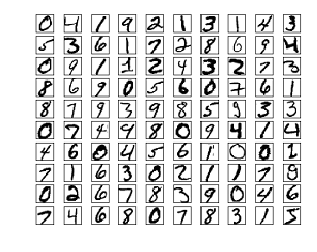

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('images/mnist_100_digits.png')
plt.axis('off')
imgplot = plt.imshow(img)

In [3]:
# Developing a neural network from scratch
# Code from http://neuralnetworksanddeeplearning.com/chap1.html
# Modified to taste, with apologies to Michael Nielsen

import random as rnd
import numpy as np

class Network(object):
    def __init__(self, sizes): # Oh, class constructors!
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
        
    def feedforward(self, a):
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a) + b)
        return a # Only the network output is returned
    
    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None): # Stochastic Gradient Descent
        training_data = list(training_data)
        n = len(training_data)
        
        if test_data: 
            test_data = list(test_data)
            n_test = len(test_data)
        
        
        for j in range(epochs): # xrange in the original code has been deprecated in Python 3
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size] for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if(test_data):
                print("Epoch {}:{}/{}".format(j, self.evaluate(test_data), n_test))
            else:
                print("Epoch {} complete".format(j))
                
    def update_mini_batch(self, mini_batch, eta):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
            
        self.weights = [w-(eta/len(mini_batch))*nw for w, nw in zip(self.weights, nabla_w)]
        self.biases =  [b-(eta/len(mini_batch))*nb for b, nb in zip(self.biases,  nabla_b)]
        
    def backprop(self, x, y):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        activation = x
        
        activations = [x]
        
        zs = []
        
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
            
        delta = self.cost_derivative(activations[-1], y)*sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta)*sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
            
        return (nabla_b, nabla_w)
    
    def evaluate(self, test_data):
        test_results = [(np.argmax(self.feedforward(x)), y) for (x, y) in test_data]
        
        return sum(int(x==y) for (x, y) in test_results)
    
    def cost_derivative(self, output_activations, y):
        return (output_activations - y)
    
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))     



In [4]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [5]:
net = Network([784, 30, 10])

In [6]:
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0:9093/10000
Epoch 1:9229/10000
Epoch 2:9283/10000
Epoch 3:9342/10000
Epoch 4:9347/10000
Epoch 5:9324/10000
Epoch 6:9407/10000
Epoch 7:9397/10000
Epoch 8:9417/10000
Epoch 9:9400/10000
Epoch 10:9455/10000
Epoch 11:9436/10000
Epoch 12:9398/10000
Epoch 13:9407/10000
Epoch 14:9434/10000
Epoch 15:9460/10000
Epoch 16:9465/10000
Epoch 17:9451/10000
Epoch 18:9454/10000
Epoch 19:9462/10000
Epoch 20:9467/10000
Epoch 21:9457/10000
Epoch 22:9444/10000
Epoch 23:9466/10000
Epoch 24:9463/10000
Epoch 25:9467/10000
Epoch 26:9466/10000
Epoch 27:9461/10000
Epoch 28:9467/10000
Epoch 29:9458/10000
